In [77]:
from astroquery.simbad import Simbad
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
#import seaborn as sns; sns.set()
%matplotlib inline

#https://physics.nist.gov/PhysRefData/Handbook/Tables/calciumtable2.htm

/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


[ True False  True False  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True False False  True]
[-4.07800007 -5.75400019 -5.9380002  -5.69099998 -5.57399988 -5.77600002
 -5.49599981 -5.52299976 -5.48000002 -5.61299992 -5.45699978 -5.296
 -5.25600004 -5.91499996 -5.17799997 -5.18200016 -5.00299978 -4.88500023
 -5.04400015 -4.85699987 -4.91099977 -4.84299994 -4.59899998 -4.75199986
 -4.42799997]
[-6.70434316 -5.95385506 -5.77061651 -5.69834404 -5.64679393 -5.64545355
 -5.63132889 -5.6223707  -5.60609162 -5.60436379 -5.56090516 -5.52084756
 -5.44806884 -5.43945227 -5.43660307 -5.42743053 -5.42295031 -5.26896994
 -5.25349877 -5.22034591 -5.21049019 -5.17341294 -5.0159545  -5.01347619
 -4.84216782]
 
0.2862 x - 3.651


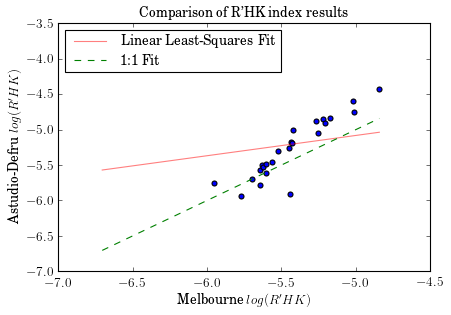

In [78]:
test = ascii.read("ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["rhk_prime"]))][:33]

bool_ad_logRHK = np.logical_and(test["ad_logRHK"] != 0.0, test["rhk_prime"] != 0)
print(bool_ad_logRHK)
ad_logRHK = np.array(test["ad_logRHK"])
print(ad_logRHK[bool_ad_logRHK])
print(np.array(np.log10(test["rhk_prime"])[bool_ad_logRHK]))

x = np.log10(test["rhk_prime"])[bool_ad_logRHK]
y = ad_logRHK[bool_ad_logRHK]
p = np.poly1d(np.polyfit(x, y, 1))
print p
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
plt.title("Comparison of R'HK index results")
plt.xlabel("Melbourne $log(R'HK)$")
plt.ylabel("Astudio-Defru $log(R'HK)$")
plt.savefig("Comparisons/compare_logrhk.png")
plt.show()

/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


[False  True False  True False  True  True  True  True  True False  True
  True False  True  True  True  True False  True  True  True  True False
  True False  True  True  True False False  True]
['HD173739' 'GJ191' 'GJ667C' 'GJ821' 'K2-3' 'GJ832' 'GJ173' 'GJ436' 'GJ581'
 'GJ163' 'GJ860A' 'GJ699' 'GJ887' 'GJ1214' 'GJ588' 'GJ273' 'GJ849' 'GJ628'
 'GJ4304' 'GJ754.1B' 'GJ676A' 'GJ876' 'GJ3470' 'GJ3053' 'GJ176' 'GJ1132'
 'GJ674' 'GJ205' 'GJ213' 'TYC1265-1118-1' 'GJ49' 'GJ1061']
[ 0.28600001  0.38299999  0.76499999  0.78500003  0.66799998  0.505
  0.70300001  0.68699998  1.15499997  1.00100005  0.76499999  0.96799999
  0.82099998  0.37200001  1.53900003  0.949       1.56900001  1.59300005
  1.63300002  2.04999995  0.57099998  1.96300006]
[ 0.29576205  0.3609498   0.48854653  0.49507168  0.51070829  0.51221573
  0.52257399  0.56052622  0.58042603  0.60472135  0.60739455  0.61717429
  0.61984368  0.656762    0.68646888  0.6881429   0.728832    0.74077326
  0.77600601  0.84521845  0.87286842  

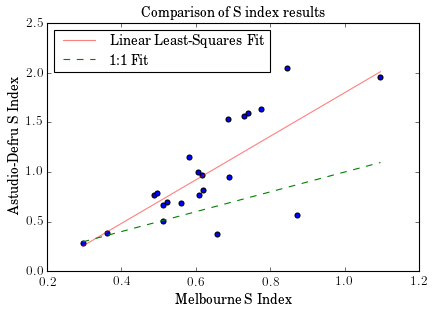

In [79]:
test = ascii.read("ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["s"]))][:33]
test = test[np.where(test["ad_S"]<11)]

bool_ad_S = np.logical_and(test["ad_S"] != 0.0, test["s"] != 0)
print(bool_ad_S)
print(np.array(test["star"]))
ad_S = np.array(test["ad_S"])
print(ad_S[bool_ad_S])
print(np.array(test["s"])[bool_ad_S])

x = test["s"][bool_ad_S]
y = ad_S[bool_ad_S]
p = np.poly1d(np.polyfit(x, y, 1))
print p
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
plt.title("Comparison of S index results")
plt.xlabel("Melbourne S Index")
plt.ylabel("Astudio-Defru S Index")
plt.savefig("Comparisons/compare_s.png")
plt.show()

/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


[True False False True False -- False True False False True False -- False
 False False False False False -- False False False False False -- False --
 True False -- False False -- False -- False -- False False False False
 False False False False -- False False False False False False -- False
 False -- False False False False False False False False False False False
 False False False False False False False False False False -- False --
 False False False False False -- -- False False True -- -- -- False False
 False -- False False False False False -- False False False]
['GJ273' 'GJ699' 'GJ176' 'GJ436' 'GJ285' 'GJ388']
[ 0.091       0.074       0.26300001  0.23999999 -9.34000015 -3.31100011]
[ 0.02765853  0.06243531  0.1570015   0.18128386 -9.42531253 -3.65981951]
 
0.9917 x + 0.09472


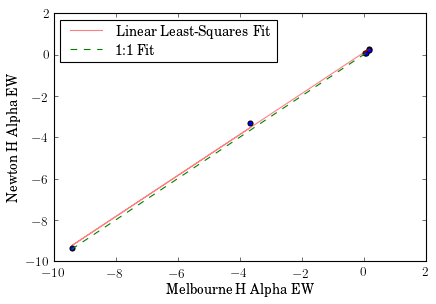

In [80]:
test = ascii.read("ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["H_alpha"]))]

bool_newt_Ha = np.logical_and(test["newt_Ha"] != 0.0, test["H_alpha"] != 0)
print(bool_newt_Ha)
print(np.array(test["star"])[bool_newt_Ha])
newt_Ha = np.array(test["newt_Ha"])
print(newt_Ha[bool_newt_Ha])
print(np.array(test["H_alpha"])[bool_newt_Ha])

x = test["H_alpha"][bool_newt_Ha]
y = newt_Ha[bool_newt_Ha]
p = np.poly1d(np.polyfit(x, y, 1))
print p
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
#plt.title("Comparison of S index results")
plt.xlabel("Melbourne H Alpha EW")
plt.ylabel("Newton H Alpha EW")
plt.savefig("Comparisons/compare_haew.png")
plt.show()

In [5]:
print(len(fit))

6


/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


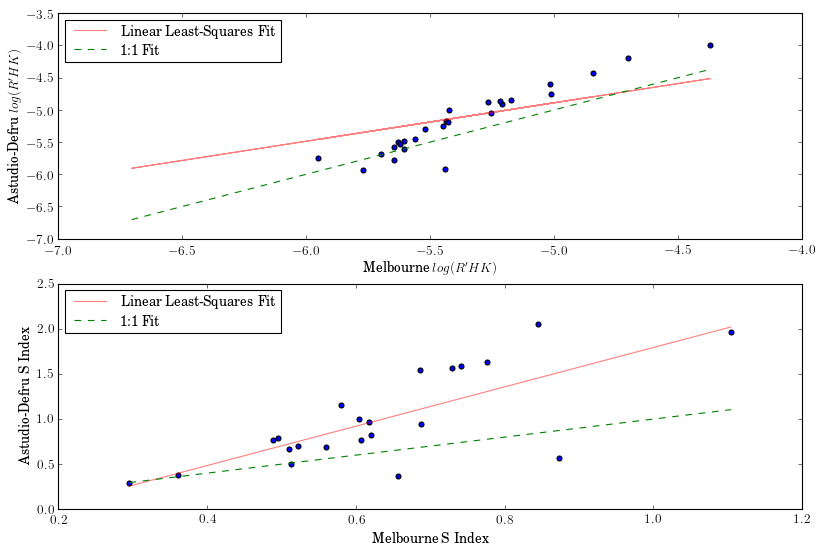

In [81]:
#fig, axs = plt.subplots(2,1, figsize=(10, 6), facecolor='w', edgecolor='k')

plt.figure(figsize=(12,8))

plt.subplot(211)
bool_ad_logRHK = np.logical_and(test["ad_logRHK"] != 0.0, test["rhk_prime"] != 0)
ad_logRHK = np.array(test["ad_logRHK"])

x = np.log10(test["rhk_prime"])[bool_ad_logRHK]
y = ad_logRHK[bool_ad_logRHK]
p = np.poly1d(np.polyfit(x, y, 1))
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
#plt.title("Comparison of R'HK index results")
plt.xlabel("Melbourne $log(R'HK)$")
plt.ylabel("Astudio-Defru $log(R'HK)$")

plt.subplot(212)
test = ascii.read("short_ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["s"]))][:33]
test = test[np.where(test["ad_S"]<11)]

bool_ad_S = np.logical_and(test["ad_S"] != 0.0, test["s"] != 0)
ad_S = np.array(test["ad_S"])

x = test["s"][bool_ad_S]
y = ad_S[bool_ad_S]
p = np.poly1d(np.polyfit(x, y, 1))
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
#plt.title("Comparison of S index results")
plt.xlabel("Melbourne S Index")
plt.ylabel("Astudio-Defru S Index")

plt.savefig("Comparisons/s_rhk_oneplot.png")
plt.show()

## Comparing H alpha values

In [82]:
test = ascii.read("ALL_DATA.dat", fill_values=[('nan', 0.0)])

riaz = np.array([5.80E+00, 1.90E+00, 5.10E+00, 1.60E+01, 4.00E+00, 3.40E+00, 2.20E+00, 
        6.50E+00, 4.00E-01, 2.40E+00])#, 1.40E+00])

riaz_overlap = ["GSC8056-0482", "2MASSJ03315564-4359135", "2MASSJ23261069-7323498", "GJ871.1A", 
                "G80-21", "CD-352722", "GJ803", 
                "TWA7", "GJ674", "GJ729"]#, "GJ644A"]

riaz_mine = np.array([test["H_alpha"][test["star"]==r][0] for r in riaz_overlap])

malo = np.array([2.30E+00, 2.30E+00, 1.50E+00])

malo_overlap = ["2MASSJ01521830-5950168", "TWA13A", "TWA13B"]

malo_mine = np.array([test["H_alpha"][test["star"]==m][0] for m in malo_overlap])

In [83]:
print(np.mean(riaz/riaz_mine), np.mean(malo/malo_mine))

(-1.4045354224402704, -0.73093678311886279)


 
-0.9447 x + 0.3771


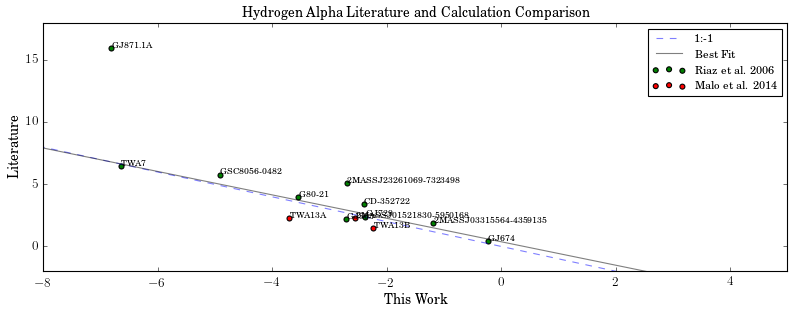

In [84]:
fig = plt.figure(figsize=(12,4))
plt.title("Hydrogen Alpha Literature and Calculation Comparison")
plt.scatter(riaz_mine,riaz, c="g", label="Riaz et al. 2006")
plt.scatter(malo_mine,malo, c="r", label="Malo et al. 2014")
plt.xlabel("This Work")
plt.ylabel("Literature")
plt.plot(np.linspace(-10,10),-np.linspace(-10,10), alpha=0.5, label="1:-1", linestyle="--", color="blue")
#plt.plot(np.linspace(-10,10),-np.linspace(-10,10)-0.67, alpha=0.5, label="-$\sigma$", linestyle="--", color="orange")
#plt.plot(np.linspace(-10,10),-np.linspace(-10,10)+0.67, alpha=0.5, label="+$\sigma$", linestyle="--", color="orange")

x = np.concatenate((riaz_mine, malo_mine), axis=0)
y = np.concatenate((riaz, malo), axis=0)
names = riaz_overlap + malo_overlap

index_to_exclude = names.index("GJ871.1A")
x = np.delete(x, index_to_exclude)
y = np.delete(y, index_to_exclude)

to_fit = np.linspace(-8,5)

p = np.poly1d(np.polyfit(x, y, 1))
fit = p(to_fit)
print(p)
plt.plot(to_fit,fit, color="black", alpha=0.5, label="Best Fit")

plt.legend(loc="upper right", fontsize=10)
plt.ylim(-2,18)
plt.xlim(-8,5)

for j, txt in enumerate(riaz_overlap):
    plt.annotate(txt, xy=(riaz_mine[j]+.01,riaz[j]+.05), fontsize=8)
    
for j, txt in enumerate(malo_overlap):
    plt.annotate(txt, xy=(malo_mine[j]+.01,malo[j]+.05), fontsize=8)

#plt.savefig("Comparisons/lit_comp_ha.png")
plt.show()

In [46]:
print x

[-4.91544    -1.18940257 -2.69950486 -6.81170151 -3.54628727 -2.40607531
 -2.71187714 -6.64918955 -0.23694036 -2.37201874 -2.54980252 -3.70883431
 -2.23667355]


In [47]:
print y

[  5.8   1.9   5.1  16.    4.    3.4   2.2   6.5   0.4   2.4   2.3   2.3
   1.5]


In [48]:
print index_to_exclude

3
